In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Sales.txt")
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
5,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
6,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
7,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
8,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
9,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [2]:
#Nan data was deleted.
df = df.dropna(how='all')
df = df[df['Order Date'].str[0:2] != 'Or']

#Added a new column and converted it to an int type.
df['Month'] = df['Order Date'].str[0:2] 
df['Month'] = df['Month'].astype('int32')


In [3]:
#Question1
#What was the best month for sales ? 

df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32') 
df['Price Each'] = df['Price Each'].astype('float')
 
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [4]:
best_sale_df = df.groupby('Month').sum()
best_sale_df #The best sale was made in the 4th month.

,Quantity Ordered,Price Each,Sales
Month,,,
4,20539,3362503.59,3385499.82
5,29,10555.45,10559.29


In [5]:
#Question2
#What city had the highest number of sales?

def get_city(address):
    return address.split(',')[1]

df['City'] =  df['Purchase Address'].apply(lambda x : get_city(x))
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [6]:
city = df.groupby('City').sum()

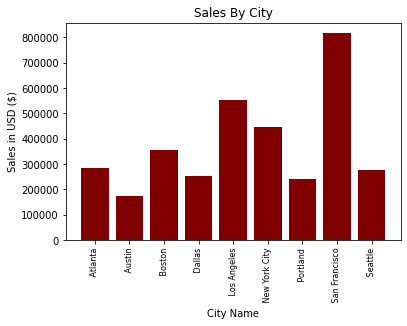

In [7]:
import matplotlib.pyplot as plt

cities = [city for city,df in df.groupby('City')]

plt.bar(cities,city['Sales'],color = ['maroon'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.title("Sales By City")
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.show()


In [8]:
#Question 3 
# What time should we display advertisements to maximize likelihood of costumer's buying product ?
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


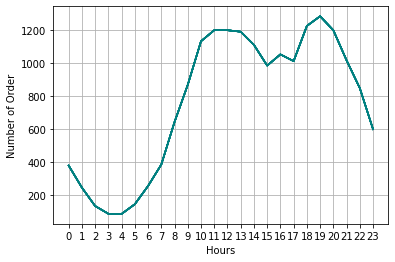

In [9]:
hours = [hour for hour,df in df.groupby('Hour')]
count_sales = df.groupby('Hour').count()

plt.plot(hours, df.groupby('Hour').count(), color = 'teal')
plt.xlabel('Hours')
plt.ylabel('Number of Order')
plt.xticks(hours)

plt.grid()
plt.show()
#---->>> My suggestion is around 7pm !!!

In [24]:
duplicated_ID = df[df['Order ID'].duplicated(keep = False)]
duplicated_ID['Grouped'] = duplicated_ID.groupby('Order ID')['Product'].transform(lambda x : ' & '.join(x))

duplicated_ID = duplicated_ID[['Order ID', 'Grouped']].drop_duplicates()
duplicated_ID.head(10)

C:\Users\Ozan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
2,176560,Google Phone & Wired Headphones
17,176574,Google Phone & USB-C Charging Cable
29,176585,Bose SoundSport Headphones & Bose SoundSport H...
31,176586,AAA Batteries (4-pack) & Google Phone
118,176672,Lightning Charging Cable & USB-C Charging Cable
128,176681,Apple Airpods Headphones & ThinkPad Laptop
137,176689,Bose SoundSport Headphones & AAA Batteries (4-...
188,176739,34in Ultrawide Monitor & Google Phone
224,176774,Lightning Charging Cable & USB-C Charging Cable
232,176781,iPhone & Lightning Charging Cable


In [52]:
from collections import Counter
from itertools import combinations


# Let's analyze which products are sold together.

count = Counter()

for row in duplicated_ID['Grouped']:
    row_list = row.split(' & ')
    count.update(Counter(combinations(row_list,2)))

common_products = count.most_common(5)
for key,value in common_products:
    print(key,value)



('Google Phone', 'USB-C Charging Cable') 106
('iPhone', 'Lightning Charging Cable') 106
('iPhone', 'Wired Headphones') 43
('Google Phone', 'Wired Headphones') 41
('iPhone', 'Apple Airpods Headphones') 37


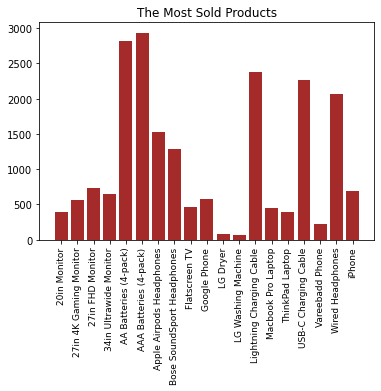

In [110]:
#What product sold the most ? 

products = []
product_group = df.groupby('Product')
for i,j in product_group:
    products.append(i)

quantity_ordered = product_group.sum()['Quantity Ordered']

plt.bar(products,quantity_ordered,color = 'brown')
plt.xticks(products,rotation = '90', size = 9)
plt.title('The Most Sold Products')
plt.show()







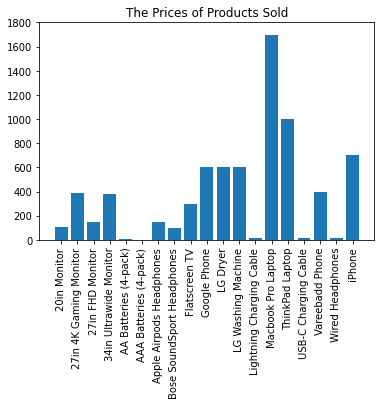

In [149]:
price_each = df.groupby('Product').mean()['Price Each']
prices = []
for i in price_each:
    prices.append(i)


products = []
product_group = df.groupby('Product')
for i,j in product_group:
    products.append(i)

plt.bar(products,price_each)
plt.xticks(products,rotation = '90')
plt.title('The Prices of Products Sold')
plt.ylim(top = 1800)
plt.show()

# I tried to show the prices of products sold.



